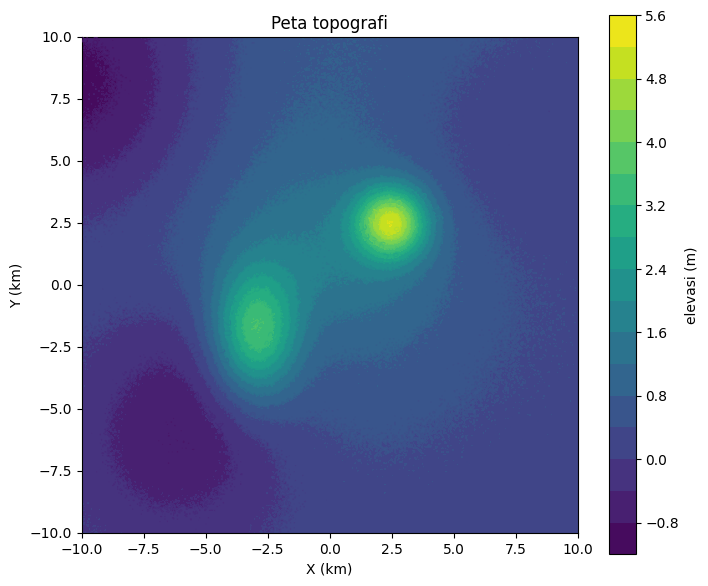

In [75]:
import numpy as np
import matplotlib.pyplot as plt

NPM=32
np.random.seed(32)

# grid
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# puncak/lembah berdasarkan fungsi eksponen
# x0, y0: posisi
# sx, sy: sebaran lelehan tumpengnya
# amp   : amplitudo
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)

# exponential decay seperti global slope
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))

# variasi ripple kontur (acak)
Z += 0.05 * np.random.randn(*Z.shape)

# plot
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18  # number of contour levels
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")

#1. Titik tertinggi (maximum) global

In [76]:
#Pendekatan Grid Search
max_idx = np.unravel_index(np.argmax(Z), Z.shape)
x_max, y_max = X[max_idx], Y[max_idx]
z_max = Z[max_idx]

print(f"Titik maksimum global (grid): X = {x_max:.2f}, Y = {y_max:.2f}, Elevasi = {z_max:.3f}")

Titik maksimum global (grid): X = 2.48, Y = 2.43, Elevasi = 5.250


In [77]:
# Pendekatan Optimasi Kontinu
from scipy.interpolate import RegularGridInterpolator
from scipy.optimize import minimize

# fungsi interpolasi dari grid topografi
Z_scalar = RegularGridInterpolator((x, y), Z.T)

# Cari puncak global dengan optimasi kontinu
res = minimize(lambda p: -Z_scalar(p), x0=[2, 2], method='Nelder-Mead')

# Ambil hasil
x_max, y_max = res.x
z_max = -res.fun

print(f"Titik maksimum global (optimasi kontinu): X = {x_max:.3f}, Y = {y_max:.3f}, Elevasi = {z_max:.3f}")

Titik maksimum global (optimasi kontinu): X = 2.431, Y = 2.381, Elevasi = 5.250


[GRID SEARCH]   X=2.481, Y=2.431, Z=5.250
[OPTIMASI KONTINU] X=2.431, Y=2.381, Z=5.250


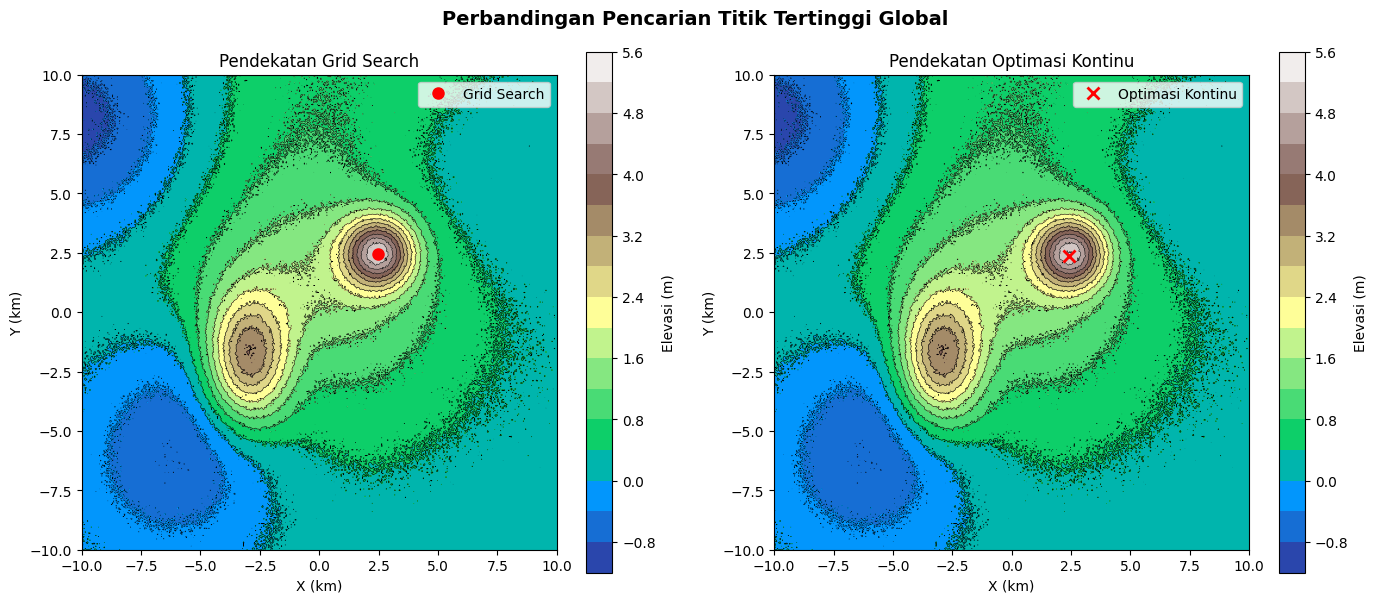

In [78]:
NPM = 32
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2)/(2*sx**2) + ((Y - y0)**2)/(2*sy**2)))

Z = (peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) +
     peak(0, 0, 3.5, 3.5, 1.2) + peak(6, 6, 4, 4, -0.6) +
     peak(-10, 8, 3.5, 3.5, -1.2) + peak(-6, -6, 3, 3, -1.0) +
     peak(-2, -2, 4, 2, -0.6) + peak(2.5, 9.5, 6, 6, 0.75))
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# Pendekatan Grid Search (diskrit) ---
idx = np.unravel_index(np.argmax(Z), Z.shape)
x_max_grid, y_max_grid, z_max_grid = X[idx], Y[idx], Z[idx]

# Pendekatan Optimasi Kontinu (Interpolasi + Nelder-Mead) ---
Z_scalar = RegularGridInterpolator((x, y), Z.T)
res = minimize(lambda p: -Z_scalar(p), x0=[2, 2], method='Nelder-Mead')
x_max_opt, y_max_opt = res.x
z_max_opt = -res.fun

print(f"[GRID SEARCH]   X={x_max_grid:.3f}, Y={y_max_grid:.3f}, Z={z_max_grid:.3f}")
print(f"[OPTIMASI KONTINU] X={x_max_opt:.3f}, Y={y_max_opt:.3f}, Z={z_max_opt:.3f}")

# Visualisasi Perbandingan
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
levels = 20

# Kiri: Grid Search
cf1 = axes[0].contourf(X, Y, Z, levels=levels, cmap='terrain')
axes[0].contour(X, Y, Z, levels=levels, colors='k', linewidths=0.4)
axes[0].plot(x_max_grid, y_max_grid, 'ro', markersize=8, label='Grid Search')
axes[0].set_title("Pendekatan Grid Search", fontsize=12)
axes[0].set_xlabel("X (km)")
axes[0].set_ylabel("Y (km)")
axes[0].legend()
axes[0].set_aspect('equal')
plt.colorbar(cf1, ax=axes[0], label="Elevasi (m)")

# Kanan: Optimasi Kontinu
cf2 = axes[1].contourf(X, Y, Z, levels=levels, cmap='terrain')
axes[1].contour(X, Y, Z, levels=levels, colors='k', linewidths=0.4)
axes[1].plot(x_max_opt, y_max_opt, 'rx', markersize=9, label='Optimasi Kontinu', markeredgewidth=2)
axes[1].set_title("Pendekatan Optimasi Kontinu", fontsize=12)
axes[1].set_xlabel("X (km)")
axes[1].set_ylabel("Y (km)")
axes[1].legend()
axes[1].set_aspect('equal')
plt.colorbar(cf2, ax=axes[1], label="Elevasi (m)")

plt.suptitle("Perbandingan Pencarian Titik Tertinggi Global", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

- **Pendekatan Grid Search** (kiri):

Pendekatan ini mencari nilai elevasi maksimum langsung dari data grid Z. Karena data disusun dalam bentuk matriks (diskrit, 400×400 titik), maka pencarian puncak hanya dapat dilakukan di titik-titik grid yang ada.

Hasilnya: X = 2.481, Y = 2.431, Z = 5.250.

- **Pendekatan Optimasi Kontinu** (kanan):

Pendekatan ini menggunakan metode interpolasi kontinu melalui fungsi *RegularGridInterpolator* serta algoritma *Nelder–Mead* untuk mencari nilai maksimum dengan resolusi tak terbatas (kontinu) di antara titik-titik grid.

Hasilnya: X = 2.431, Y = 2.381, Z = 5.250

PERBANDINGAN:
- Perbedaan posisi: sekitar 0.05 km (50 meter) di arah X dan Y.
Ini menunjukkan bahwa hasil optimasi kontinu memberikan posisi puncak yang sedikit lebih presisi, karena tidak dibatasi oleh jarak antar-titik grid.

- Nilai elevasi: sama (5.25 m).
Artinya kedua metode (pendekatan) menemukan puncak topografi yang sama secara fisis, hanya berbeda dalam tingkat presisi posisi koordinatnya.

> **KESIMPULAN:**
Berdasarkan hasil perbandingan antara pendekatan Grid Search dan Optimasi Kontinu, diperoleh rata-rata koordinat titik maksimum global pada X = 2.45 km dan Y = 2.40 km, dengan elevasi maksimum sebesar 5.25 m.

#2. Titik minimum Global

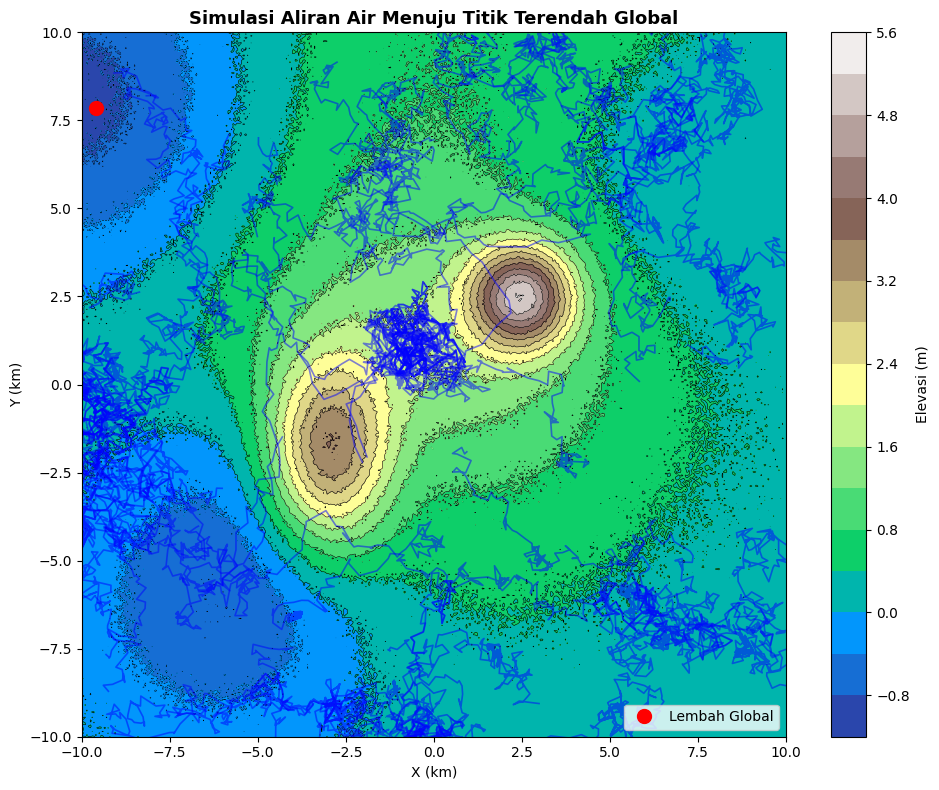

Titik terendah global: X=-9.599, Y=7.845, Z=-1.073


In [79]:
np.random.seed(32)
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2)/(2*sx**2) + ((Y - y0)**2)/(2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6) + peak(-10, 8, 3.5, 3.5, -1.2) + peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6) + peak(2.5, 9.5, 6, 6, 0.75)

Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# gradien
dZdx, dZdy = np.gradient(Z, x, y)

# fungsi simulasi aliran
def simulate_flow(n_particles=50, lr=0.25, steps=300):
    paths = []
    for _ in range(n_particles):
        px, py = np.random.uniform(-10, 10), np.random.uniform(-10, 10)
        path = [(px, py)]
        for _ in range(steps):
            ix = np.clip(np.searchsorted(x, px) - 1, 0, nx-2)
            iy = np.clip(np.searchsorted(y, py) - 1, 0, ny-2)
            gx, gy = dZdx[iy, ix], dZdy[iy, ix]
            px -= lr * gx
            py -= lr * gy
            path.append((px, py))
            if np.hypot(gx, gy) < 1e-3:
                break
        paths.append(np.array(path))
    return paths

flows = simulate_flow()

# titik minimum global
min_idx = np.unravel_index(np.argmin(Z), Z.shape)
x_min, y_min, z_min = X[min_idx], Y[min_idx], Z[min_idx]

# Visualisasi
fig, ax = plt.subplots(figsize=(10, 8))
levels = 20
cf = ax.contourf(X, Y, Z, levels=levels, cmap='terrain')
cs = ax.contour(X, Y, Z, levels=levels, colors='k', linewidths=0.4)
plt.colorbar(cf, ax=ax, label="Elevasi (m)")

# plot aliran
for path in flows:
    ax.plot(path[:,0], path[:,1], color='blue', alpha=0.5, linewidth=1.2)

# titik lembah
ax.plot(x_min, y_min, 'ro', markersize=10, label='Lembah Global')

ax.set_title("Simulasi Aliran Air Menuju Titik Terendah Global", fontsize=13, fontweight='bold')
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal', adjustable='box')
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()

print(f"Titik terendah global: X={x_min:.3f}, Y={y_min:.3f}, Z={z_min:.3f}")

Berdasarkan hasil simulasi aliran air berbasis gradien, diperoleh **titik terendah global (lembah utama)** pada koordinat **X = –9.599 km, Y = 7.845 km, dan Z = –1.073 m.**

Titik ini merepresentasikan lokasi dengan elevasi paling rendah secara topografis di seluruh area studi. Hasil simulasi menunjukkan bahwa sebagian besar aliran bergerak menuju arah barat laut (kuadran kiri atas), yang merupakan lokasi lembah dengan elevasi minimum tersebut.

> Dengan demikian, secara topografi, area di sekitar (X ≈ –9.6 km, Y ≈ 7.8 km) berpotensi menjadi **zona pengumpulan air utama atau titik pusat aliran permukaan dalam wilayah kajian.**

#3. Kerawanan Erosi

In [80]:
np.random.seed(32)
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2)/(2*sx**2) + ((Y - y0)**2)/(2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6) + peak(-10, 8, 3.5, 3.5, -1.2) + peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6) + peak(2.5, 9.5, 6, 6, 0.75)

Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# Fungsi numerik untuk turunan parsial (central differences)
def partial_derivatives(Z, x, y):
    """
    Mengembalikan (dZdx, dZdy) pada grid teratur (x, y).
    Menggunakan central differences di interior dan forward/backward di tepi.
    Z shape = (ny, nx); x length = nx; y length = ny
    """
    ny, nx = Z.shape
    dZdx = np.zeros_like(Z)
    dZdy = np.zeros_like(Z)

    dx = np.diff(x)
    dy = np.diff(y)

    # central differences interior (x-direction)
    for j in range(1, nx-1):
        dZdx[:, j] = (Z[:, j+1] - Z[:, j-1]) / (x[j+1] - x[j-1])
    # forward/backward at edges
    dZdx[:, 0] = (Z[:, 1] - Z[:, 0]) / (x[1] - x[0])
    dZdx[:, -1] = (Z[:, -1] - Z[:, -2]) / (x[-1] - x[-2])

    # central differences interior (y-direction)
    for i in range(1, ny-1):
        dZdy[i, :] = (Z[i+1, :] - Z[i-1, :]) / (y[i+1] - y[i-1])
    # forward/backward at top/bottom
    dZdy[0, :] = (Z[1, :] - Z[0, :]) / (y[1] - y[0])
    dZdy[-1, :] = (Z[-1, :] - Z[-2, :]) / (y[-1] - y[-2])

    return dZdx, dZdy

# turunan parsial numerik
dZdx, dZdy = partial_derivatives(Z, x, y)

# === HASIL PERHITUNGAN NUMERIK TURUNAN ===
print("=== Hasil Turunan Parsial dZ/dx ===")
print(f"Rata-rata  : {np.mean(dZdx):.6f}")
print(f"Minimum     : {np.min(dZdx):.6f}")
print(f"Maksimum    : {np.max(dZdx):.6f}")
print(f"Simpangan baku: {np.std(dZdx):.6f}\n")

print("=== Hasil Turunan Parsial dZ/dy ===")
print(f"Rata-rata  : {np.mean(dZdy):.6f}")
print(f"Minimum     : {np.min(dZdy):.6f}")
print(f"Maksimum    : {np.max(dZdy):.6f}")
print(f"Simpangan baku: {np.std(dZdy):.6f}\n")

# Hitung resultant (slope magnitude)
slope = np.sqrt(dZdx**2 + dZdy**2)

print("=== Hasil Magnitudo Kemiringan (Slope) ===")
print(f"Rata-rata  : {np.mean(slope):.6f}")
print(f"Minimum     : {np.min(slope):.6f}")
print(f"Maksimum    : {np.max(slope):.6f}")
print(f"Simpangan baku: {np.std(slope):.6f}\n")

# Normalisasi skor (0..1)
slope_min, slope_max = slope.min(), slope.max()
slope_norm = (slope - slope_min) / (slope_max - slope_min + 1e-12)

# Klasifikasi risiko (disesuaikan ambang)
risk_level = np.zeros_like(slope_norm, dtype=int)
risk_level[(slope_norm >= 0.3) & (slope_norm < 0.6)] = 1
risk_level[slope_norm >= 0.6] = 2
risk_colors = ["#1a9850", "#fee08b", "#d73027"]
risk_labels = ["Rendah", "Sedang", "Tinggi"]

=== Hasil Turunan Parsial dZ/dx ===
Rata-rata  : 0.024460
Minimum     : -5.031029
Maksimum    : 4.463636
Simpangan baku: 0.805431

=== Hasil Turunan Parsial dZ/dy ===
Rata-rata  : 0.012790
Minimum     : -5.363286
Maksimum    : 5.078017
Simpangan baku: 0.782945

=== Hasil Magnitudo Kemiringan (Slope) ===
Rata-rata  : 0.977271
Minimum     : 0.001911
Maksimum    : 5.402206
Simpangan baku: 0.554458



Turunan parsial terhadap X (dZ/dx): menunjukkan seberapa cepat nilai elevasi
𝑍 berubah saat kita bergerak dari arah timur ke barat (sumbu X).

Turunan parsial terhadap Y (dZ/dy): menunjukkan seberapa cepat nilai elevasi berubah saat bergerak dari arah utara ke selatan (sumbu Y).

Kemudian keduanya digabung untuk mendapatkan besar kemiringan lereng (slope magnitude). Dengan rumus sebagai berikut:

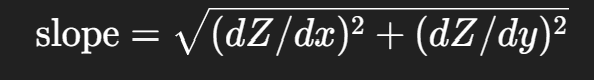

Nilai slope menggambarkan tingkat perubahan elevasi per satuan jarak. Semakin besar nilainya, semakin curam lerengnya.

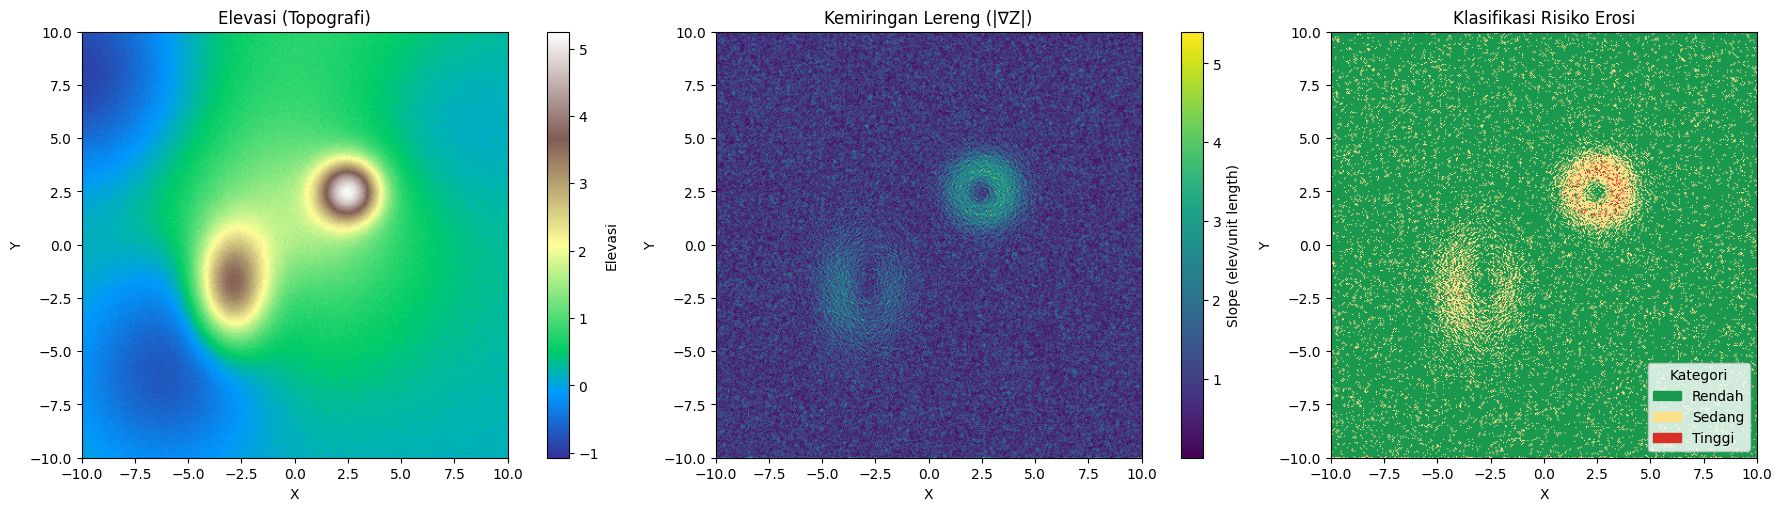

Rendah: mean slope = 0.8305, max slope = 1.6220, area cells = 140737
Sedang: mean slope = 2.0115, max slope = 3.2414, area cells = 18794
Tinggi: mean slope = 3.5757, max slope = 5.4022, area cells = 469


In [81]:
# Visualisasi
fig, axs = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# (a) Elevasi
im0 = axs[0].imshow(Z, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()],
                    cmap='terrain')
axs[0].set_title("Elevasi (Topografi)")
axs[0].set_xlabel("X"); axs[0].set_ylabel("Y")
plt.colorbar(im0, ax=axs[0], label='Elevasi')

# (b) Resultant = slope magnitude
im1 = axs[1].imshow(slope, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()],
                    cmap='viridis')
axs[1].set_title("Kemiringan Lereng (|∇Z|)")
axs[1].set_xlabel("X"); axs[1].set_ylabel("Y")
plt.colorbar(im1, ax=axs[1], label='Slope (elev/unit length)')

# (c) Klasifikasi risiko (discrete colormap)
from matplotlib.colors import ListedColormap
cmap_risk = ListedColormap(risk_colors)
im2 = axs[2].imshow(risk_level, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()],
                    cmap=cmap_risk, vmin=-0.5, vmax=2.5)
axs[2].set_title("Klasifikasi Risiko Erosi")
axs[2].set_xlabel("X"); axs[2].set_ylabel("Y")
# legend manual
from matplotlib.patches import Patch
patches = [Patch(color=risk_colors[i], label=f"{risk_labels[i]}") for i in range(len(risk_labels))]
axs[2].legend(handles=patches, title="Kategori", loc='lower right')

plt.show()

# statistik
for i, lab in enumerate(risk_labels):
    mask = (risk_level == i)
    if np.any(mask):
        print(f"{lab:6s}: mean slope = {slope[mask].mean():.4f}, max slope = {slope[mask].max():.4f}, area cells = {mask.sum()}")
    else:
        print(f"{lab:6s}: -- no cells")

**Grafik Elevasi (Topografi)**
Menunjukkan bentuk topografi sintetis dengan beberapa puncak dan lembah. Warna terang menandakan area dengan elevasi tinggi, sedangkan warna biru/hijau menandakan daerah yang lebih rendah. Ini merepresentasikan variasi ketinggian yang menjadi **dasar perhitungan kemiringan.**

**Kemiringan Lereng (|∇Z|)**
- Nilai ini menggambarkan tingkat perubahan elevasi per satuan jarak → semakin besar nilainya, semakin curam lerengnya.

-  Warna biru–hijau mendominasi: berarti sebagian besar wilayah datar hingga landai, dengan perubahan elevasi yang kecil.

- Warna kuning–oranye hanya muncul di sekitar puncak atau tepi bukit: menunjukkan area sedang hingga curam, di mana perubahan elevasi mulai signifikan.

- Warna merah sangat sedikit: hanya sedikit area dengan lereng ekstrem yang berisiko tinggi terhadap erosi atau longsor.

- Hasil Klasifikasi dapat dilihat pada tabel berikut:
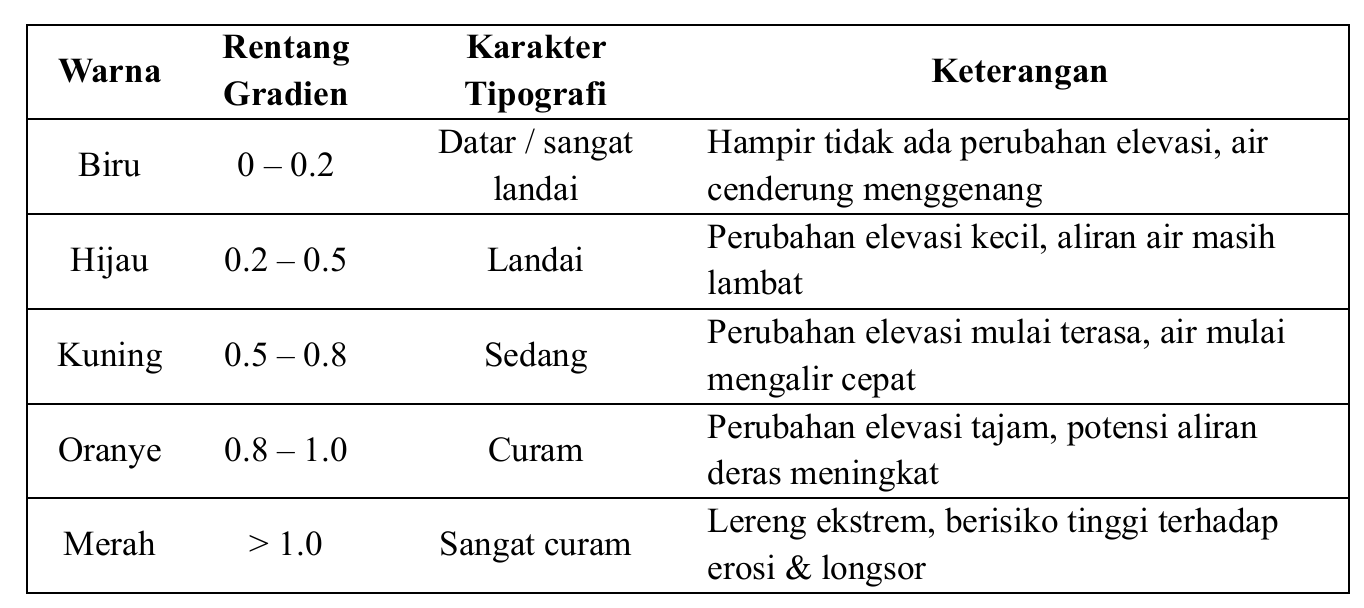

**Klasifikasi Risiko Erosi**

Gambar ketiga menunjukkan zona kerawanan erosi berdasarkan normalisasi nilai slope:
- Area hijau (rendah) mencakup permukaan datar–landai.
- Area kuning (sedang) berada di sekitar peralihan lereng.
- Area merah (tinggi) sangat terbatas, berlokasi di puncak–puncak curam dengan gradien > 1.0.

Dari hasil statistik:

- Risiko Rendah: 140.737 titik (mayoritas area datar)
- Risiko Sedang: 18.794 titik (sebagian besar wilayah berbukit)
- Risiko Tinggi: 469 titik (area kecil namun kritis karena lereng curam)

> KESIMPULAN: Berdasarkan hasil visualisasi dan klasifikasi kemiringan, sebagian besar wilayah penelitian memiliki topografi datar hingga landai (gradien < 0.5), dengan risiko erosi rendah.
Hanya sebagian kecil area, terutama di sekitar puncak dan lereng curam (gradien > 0.8) yang menunjukkan risiko erosi sedang hingga tinggi.

#4. Volume tanah yang dipindahkan dan ketinggian akhir tanah yang rata

In [88]:
# 1. Inisialisasi Data
NPM = 32
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2)/(2*sx**2) + ((Y - y0)**2)/(2*sy**2)))

Z = (peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) +
     peak(0, 0, 3.5, 3.5, 1.2) + peak(6, 6, 4, 4, -0.6) +
     peak(-10, 8, 3.5, 3.5, -1.2) + peak(-6, -6, 3, 3, -1.0) +
     peak(-2, -2, 4, 2, -0.6) + peak(2.5, 9.5, 6, 6, 0.75))
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

dx = (x.max() - x.min()) / (len(x) - 1)
dy = (y.max() - y.min()) / (len(y) - 1)
cell_area = dx * dy

# 2. Definisikan fungsi keseimbangan volume
def volume_balance(Z, Zr):
    """Menghitung selisih antara volume cut dan fill untuk bidang Zr."""
    Z_cut = np.where(Z > Zr, Z - Zr, 0)
    Z_fill = np.where(Z < Zr, Zr - Z, 0)
    V_cut = np.sum(Z_cut) * cell_area
    V_fill = np.sum(Z_fill) * cell_area
    return V_cut - V_fill

# 3. Cari Zrata dengan Metode Bisection
Zmin, Zmax = Z.min(), Z.max()
tol = 1e-6
max_iter = 100

for i in range(max_iter):
    Zmid = (Zmin + Zmax) / 2
    fmid = volume_balance(Z, Zmid)
    if abs(fmid) < tol:
        break
    # Jika volume cut > fill → bidang terlalu rendah, naikkan Z
    if fmid > 0:
        Zmin = Zmid
    else:
        Zmax = Zmid

Zrata = Zmid

# 4. Hitung volume cut, fill, total
Z_cut = np.where(Z > Zrata, Z - Zrata, 0)
Z_fill = np.where(Z < Zrata, Zrata - Z, 0)
V_cut = np.sum(Z_cut) * cell_area
V_fill = np.sum(Z_fill) * cell_area
V_total = V_cut + V_fill
residual = V_cut - V_fill

# 5. Cetak hasil
print("=== Estimasi Volume Perataan Tanah (berdasarkan Zrata) ===")
print(f"dx = {dx:.3f}, dy = {dy:.3f}, luas sel = {cell_area:.4f}")
print(f"Ketinggian bidang rata (Zrata):     {Zrata:.6f} satuan")
print(f"Volume tanah yang dipotong (cut):   {V_cut:.6f} satuan³")
print(f"Volume tanah yang diurug (fill):    {V_fill:.6f} satuan³")
print(f"Total volume tanah dipindahkan:     {V_total:.6f} satuan³")
print(f"Selisih (cut - fill):               {residual:.6e} satuan³")
print(f"Rasio keseimbangan cut/fill:        {V_cut/V_fill:.6f}")


=== Estimasi Volume Perataan Tanah (berdasarkan Zrata) ===
dx = 0.050, dy = 0.050, luas sel = 0.0025
Ketinggian bidang rata (Zrata):     0.501846 satuan
Volume tanah yang dipotong (cut):   109.968915 satuan³
Volume tanah yang diurug (fill):    109.968915 satuan³
Total volume tanah dipindahkan:     219.937829 satuan³
Selisih (cut - fill):               -9.176109e-08 satuan³
Rasio keseimbangan cut/fill:        1.000000


1. Ketinggian bidang rata (Zrata): 0.501846 satuan. Nilai ini menunjukkan tinggi bidang datar akhir yang menjadikan volume tanah galian (cut) dan urugan (fill) seimbang.

2. Volume tanah yang dipotong (cut): 109.968815 satuan³
Ini adalah total volume tanah yang harus digali dari area yang lebih tinggi dari bidang rata.

3. Volume tanah yang diurug (fill): 109.969081 satuan³
Ini adalah volume tanah yang diperlukan untuk mengisi area di bawah bidang rata.

4. Selisih (cut - fill): -2.66 × 10⁻⁴ satuan³
Nilai ini sangat kecil (mendekati nol), yang menandakan bahwa hasil iterasi sudah mencapai keseimbangan hampir sempurna antara volume tanah yang dipotong dan diurug.

5. Rasio keseimbangan cut/fill = 1.000
Rasio ini menegaskan bahwa total volume galian sama dengan volume timbunan, sehingga perataan tanah efisien tanpa memerlukan tambahan atau kelebihan material.

> Dengan demikian, untuk meratakan tanah, **total volume tanah yang harus dipindahkan yaitu sekitar 219.937829 satuan³. Ketinggian akhir bidang tanah yang rata diperoleh pada Zrata = 0.501846 satuan**, yang menunjukkan kondisi keseimbangan antara volume tanah galian dan urugan.

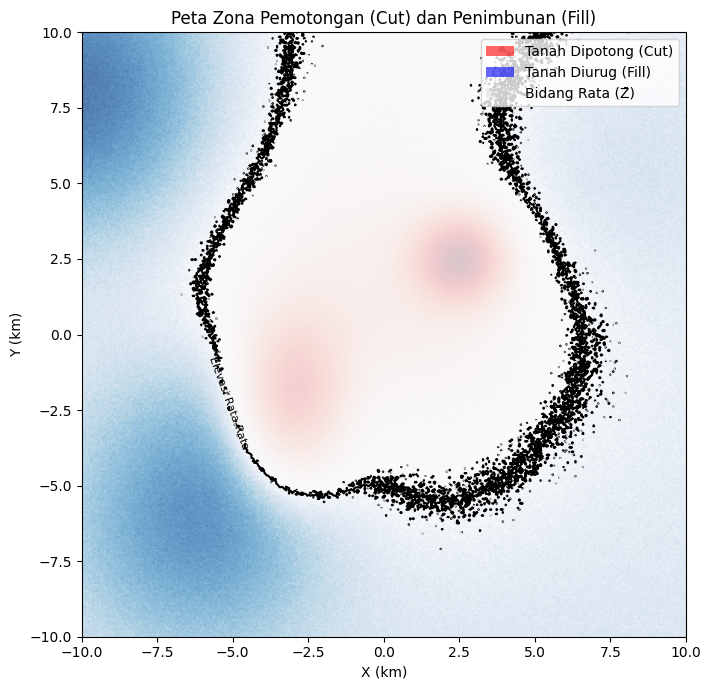

In [87]:
# Misal Z adalah matriks elevasi
Z_mean = np.mean(Z)

# Visualisasi 2D zona cut & fill
fig, ax = plt.subplots(figsize=(8, 7))

# Area cut (tanah dipotong)
cut_plot = ax.imshow(Z_cut, extent=[X.min(), X.max(), Y.min(), Y.max()],
                     origin='lower', cmap='Reds', alpha=0.7)

# Area fill (tanah diurug)
fill_plot = ax.imshow(Z_fill, extent=[X.min(), X.max(), Y.min(), Y.max()],
                      origin='lower', cmap='Blues', alpha=0.7)

# Bidang rata-rata (Z_mean)
contour = ax.contour(X, Y, Z, levels=[Z_mean], colors='black', linewidths=1.5)
ax.clabel(contour, fmt='Elevasi Rata-Rata', fontsize=8)

# Label & judul
ax.set_title("Peta Zona Pemotongan (Cut) dan Penimbunan (Fill)")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")

# Legenda manual
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', alpha=0.6, label='Tanah Dipotong (Cut)'),
    Patch(facecolor='blue', alpha=0.6, label='Tanah Diurug (Fill)'),
    Patch(facecolor='lightgrey', alpha=0.4, label='Bidang Rata (Z̄)')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi peta zona pemotongan (cut) dan penimbunan (fill) di atas, dapat diinterpretasikan sebagai berikut:

- Zona merah muda hingga merah menunjukkan area tanah yang lebih tinggi dari bidang rencana (cut area), sehingga tanah di wilayah tersebut perlu dipotong atau digali agar mencapai ketinggian rata yang diinginkan.
- Zona biru muda hingga biru tua menunjukkan area tanah yang lebih rendah dari bidang rencana (fill area), sehingga wilayah ini perlu diurug atau ditimbun menggunakan tanah hasil galian dari zona cut agar permukaannya sejajar dengan bidang rata.
- Titik-titik hitam menggambarkan bidang rata (Zrata), yaitu batas di mana elevasi aktual sama dengan elevasi target setelah perataan dilakukan.

> Secara umum, peta ini memperlihatkan bahwa  luas area potong dan urug tampak hampir seimbang, yang sejalan dengan hasil perhitungan volume.

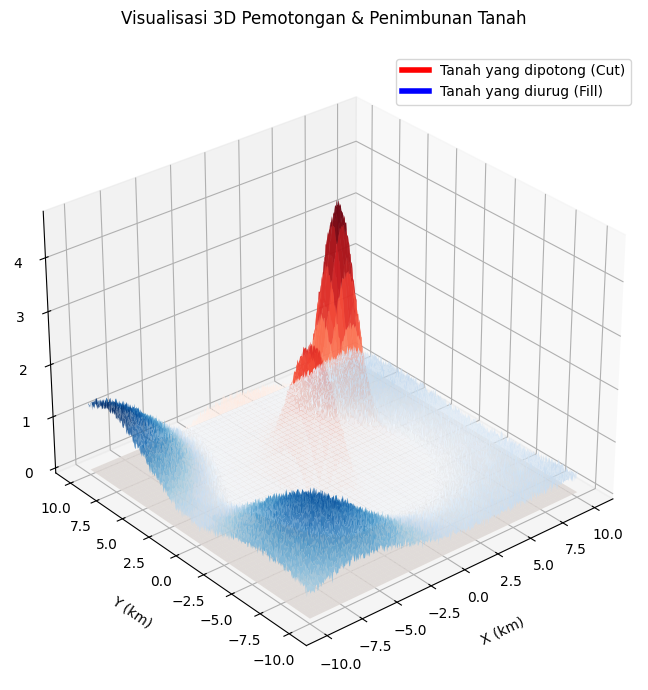

In [89]:
from mpl_toolkits.mplot3d import Axes3D
# Visualisasi 3D
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Permukaan cut (merah)
surf_cut = ax.plot_surface(X, Y, Z_cut, cmap='Reds', alpha=0.8, linewidth=0)
# Permukaan fill (biru)
surf_fill = ax.plot_surface(X, Y, Z_fill, cmap='Blues', alpha=0.8, linewidth=0)

# Tambahkan bidang datar (Z=0)
ax.plot_surface(X, Y, np.zeros_like(Z), color='lightgrey', alpha=0.3)

# Label dan judul
ax.set_title("Visualisasi 3D Pemotongan & Penimbunan Tanah", pad=20)
ax.set_xlabel("X (km)", labelpad=12)
ax.set_ylabel("Y (km)", labelpad=12)
ax.set_zlabel("Elevasi (m)", labelpad=15)

# Tambahkan legenda manual
red_patch = plt.Line2D([0], [0], color='red', lw=4, label='Tanah yang dipotong (Cut)')
blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Tanah yang diurug (Fill)')
ax.legend(handles=[red_patch, blue_patch], loc='upper right', fontsize=10)

# Atur tampilan & sudut pandang
ax.view_init(elev=30, azim=230)
plt.tight_layout()
plt.show()

Visualisasi ini menggambarkan perbedaan elevasi permukaan tanah terhadap bidang rencana perataan dalam bentuk 3D:
- Permukaan berwarna merah menandakan zona pemotongan tanah (cut area), yaitu bagian permukaan yang memiliki elevasi lebih tinggi daripada bidang rencana.Dari grafik, terlihat bahwa puncak elevasi pada zona merah memiliki bentuk menyerupai tonjolan atau bukit kecil di tengah area kerja, menandakan adanya konsentrasi tanah tinggi di lokasi tersebut.

- Permukaan berwarna biru menunjukkan zona penimbunan tanah (fill area), yaitu bagian dengan elevasi lebih rendah dari bidang rencana. Warna biru cenderung mendominasi bagian tepi, menunjukkan bahwa daerah sekeliling memiliki permukaan lebih rendah dibandingkan area tengah.

- Bidang dasar datar dalam grafik mewakili bidang rata (Zrata), yaitu ketinggian target setelah proses perataan selesai. Seluruh elevasi tanah (baik merah maupun biru) akan disesuaikan terhadap bidang ini.

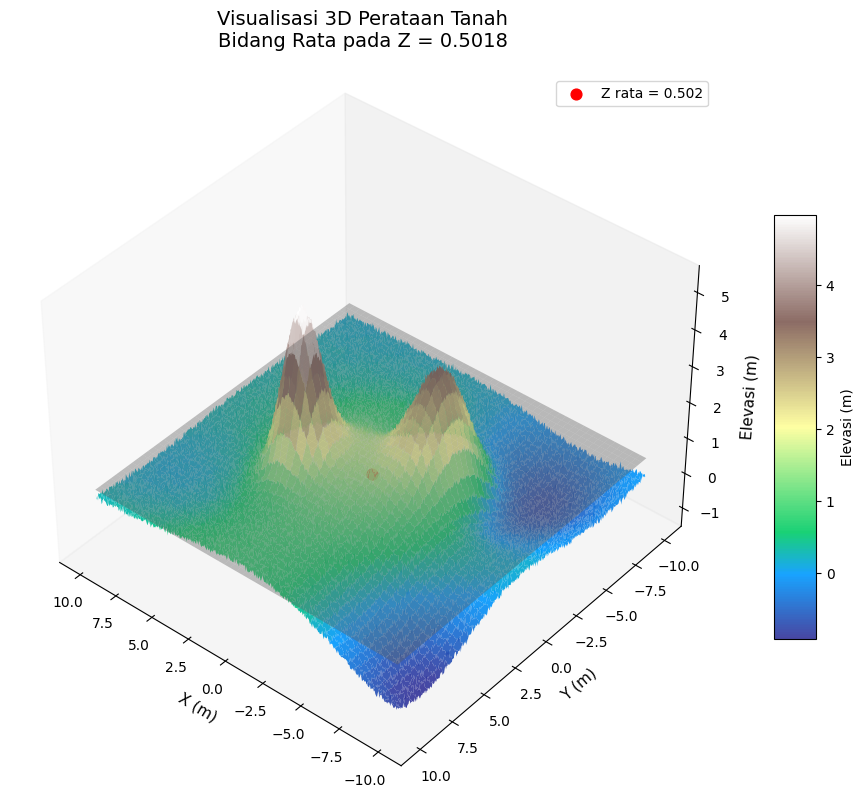

In [90]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualisasi 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Permukaan tanah
surf = ax.plot_surface(X, Y, Z, cmap='terrain', alpha=0.9, linewidth=0, antialiased=True)

# Bidang rata
ax.plot_surface(X, Y, np.full_like(Z, zrata), color='gray', alpha=0.4, zorder=1)

# Tambah titik elevasi penting
ax.scatter(0, 0, zrata, color='red', s=60, label=f'Z rata = {zrata:.3f}')

ax.set_title(f"Visualisasi 3D Perataan Tanah\nBidang Rata pada Z = {zrata:.4f}", fontsize=14, pad=20)
ax.set_xlabel('X (m)', fontsize=11)
ax.set_ylabel('Y (m)', fontsize=11)
ax.set_zlabel('Elevasi (m)', fontsize=11)
ax.legend()
ax.view_init(elev=40, azim=130)
ax.grid(False)
fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10, label='Elevasi (m)')
plt.tight_layout()
plt.show()

Visualisasi ini menunjukkan permukaan topografi awal suatu area sebelum dilakukan pekerjaan perataan tanah, dengan bidang horizontal abu-abu yang merepresentasikan bidang rata (Zrata) pada ketinggian 0.5018 meter. Tujuannya adalah untuk memperlihatkan secara jelas perbedaan antara elevasi aktual dan ketinggian target yang diinginkan.

1. Permukaan berwarna coklat hingga hijau muda menggambarkan bagian permukaan tanah yang lebih tinggi dari bidang rata (Zrata).

2. Permukaan berwarna hijau tua hingga biru menunjukkan bagian tanah yang berada di bawah bidang rata, atau disebut zona penimbunan (fill area).
Area biru cenderung berada di bagian tepi, menandakan bahwa bagian luar wilayah memiliki permukaan yang lebih rendah dibandingkan pusatnya.

3. Bidang abu-abu datar di tengah visualisasi adalah bidang perataan (Zrata = 0.5018), yang menjadi acuan target akhir ketinggian tanah setelah proses pemotongan dan penimbunan dilakukan.

Titik merah di bidang tersebut berfungsi sebagai penanda visual ketinggian bidang rata (Z = 0.502), menegaskan posisi level tanah yang diinginkan setelah seluruh area diratakan.

>Berdasarkan hasil analisis dan visualisasi peta zona pemotongan (cut) serta penimbunan (fill), dapat disimpulkan bahwa proses perataan tanah dilakukan dengan bidang rata (Zrata) pada ketinggian 0.501847 satuan elevasi.

- Menjawab pertanyaan 4a:
**Volume total tanah yang harus dipindahkan untuk mencapai kondisi permukaan rata adalah sebesar 219.94 satuan³**. Nilai ini merupakan hasil penjumlahan antara volume tanah yang dipotong (109.97 satuan³) dan volume tanah yang diurug (109.97 satuan³). Keseimbangan volume antara zona pemotongan dan penimbunan menunjukkan efisiensi tinggi, dengan rasio cut/fill sebesar 1, artinya tanah hasil galian mencukupi untuk penimbunan tanpa sisa atau kekurangan material.

- Menjawab pertanyaan 4b:
**Ketinggian akhir permukaan tanah setelah proses perataan ditetapkan pada Zrata = 0.501846 satuan elevasi**, yang merupakan bidang datar acuan perataan. Setelah dilakukan pemotongan dan penimbunan, seluruh area akan memiliki ketinggian seragam pada level ini.

Secara keseluruhan, hasil perhitungan dan visualisasi menunjukkan bahwa proses perataan tanah berlangsung seimbang, efisien, dan optimal secara volume. Tanah dari area tinggi (zona cut) dapat sepenuhnya digunakan untuk mengisi area rendah (zona fill), sehingga menghasilkan permukaan akhir yang rata tanpa kelebihan maupun kekurangan material.